In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score

### MLRCARE-Careseeking for children under age 5 with fever-Percentage of children (under age 5) with fever for whom advice or treatment was sought

In [2]:
pd.set_option("display.max_columns", None)
mlrcare = pd.read_excel("Final_malaria.xlsx", sheet_name = 0)
mlrcare

,ISO,Countries,UNICEF Reporting region,UNICEF Programme Region,World Bank Income Group (2022),Year,Short Source,Long Source,National,Male,Female,Rural,Urban,Poorest,Second,Middle,Fourth,Richest,None,Primary,Sec & Higher
0,AFG,Afghanistan,South Asia,ROSA,Low income,2015,DHS 2015,Demographic and Health Survey 2015,63.2,NaN,NaN,62.3,65.9,61.1,62.0,61.1,67.7,64.1,NaN,NaN,NaN
1,AFG,Afghanistan,South Asia,ROSA,Low income,2018,Afghanistan Health Survey 2018,Afghanistan Health Survey 2018. Amsterdam: KIT...,62.1,60.9,63.2,63.1,59.5,56.6,67.2,59.9,63.5,63.6,60.9,66.1,NaN
2,AGO,Angola,Eastern and Southern Africa,ESARO,Lower middle income,2016,DHS 2015-2016,Demographic and Health Survey 2015-2016,50.8,51.0,50.5,42.6,57.1,36.9,47.3,56.7,59.7,63.3,NaN,NaN,NaN
3,ALB,Albania,Eastern Europe and Central Asia,ECARO,Upper middle income,2009,DHS 2008-2009,Demographic and Health Survey 2008-2009,71.2,80.9,60.7,69.6,73.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALB,Albania,Eastern Europe and Central Asia,ECARO,Upper middle income,2018,DHS 2017-2018,Demographic and Health Survey 2017-2018,59.6,60.8,58.3,53.6,66.9,44.3,66.3,63.6,NaN,NaN,NaN,54.0,63.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,ZAF,South Africa,Eastern and Southern Africa,ESARO,Upper middle income,2016,DHS 2016,Demographic and Health Survey 2016,68.4,69.0,67.7,63.7,70.8,64.0,67.3,68.6,69.3,73.3,NaN,NaN,NaN
203,ZMB,Zambia,Eastern and Southern Africa,ESARO,Low income,2014,DHS 2013-2014,Demographic and Health Survey 2013-2014,74.9,75.9,73.9,72.9,79.4,70.1,75.7,75.0,79.6,77.1,NaN,NaN,NaN
204,ZMB,Zambia,Eastern and Southern Africa,ESARO,Low income,2019,DHS 2018-2019,Demographic and Health Survey 2018-2019,77.2,79.4,74.9,77.7,75.9,73.6,79.4,84.2,75.4,75.7,77.5,75.0,80.6
205,ZWE,Zimbabwe,Eastern and Southern Africa,ESARO,Lower middle income,2014,MICS 2014,Multiple Indicator Cluster Survey 2014,47.1,46.6,47.5,48.1,43.6,44.6,48.9,48.3,45.3,49.4,NaN,NaN,NaN


In [3]:
mlrcare.isnull().sum()

ISO                                 0
Countries                           0
UNICEF Reporting region             0
UNICEF Programme Region             0
World Bank Income Group (2022)      0
Year                                0
Short Source                        0
Long Source                         0
National                            1
Male                               20
Female                             20
Rural                              16
Urban                              15
Poorest                            27
Second                             29
Middle                             27
Fourth                             27
Richest                            29
None                              161
Primary                           154
Sec & Higher                      156
dtype: int64

In [4]:
mlrcare.head(2)

,ISO,Countries,UNICEF Reporting region,UNICEF Programme Region,World Bank Income Group (2022),Year,Short Source,Long Source,National,Male,Female,Rural,Urban,Poorest,Second,Middle,Fourth,Richest,None,Primary,Sec & Higher
0,AFG,Afghanistan,South Asia,ROSA,Low income,2015,DHS 2015,Demographic and Health Survey 2015,63.2,NaN,NaN,62.3,65.9,61.1,62.0,61.1,67.7,64.1,NaN,NaN,NaN
1,AFG,Afghanistan,South Asia,ROSA,Low income,2018,Afghanistan Health Survey 2018,Afghanistan Health Survey 2018. Amsterdam: KIT...,62.1,60.9,63.2,63.1,59.5,56.6,67.2,59.9,63.5,63.6,60.9,66.1,NaN


In [5]:
#mlrcare = mlrcare.fillna(mlrcare.mean())

#### Using KNN impute to Handle missing values because each entity has different pattern of values.
#### An entity is the summary of a country in a year

In [6]:
# Columns to impute
columns_to_impute = ['National', 'Male', 'Female', 'Rural', 'Urban', 'Poorest', 'Second', 'Middle', 'Fourth', 'Richest', 'None', 'Primary', 'Sec & Higher']

#Create a KNN Imputer object
imputer = KNNImputer(n_neighbors=5, weights='uniform')

#Fit and transform the data
imputed_data = imputer.fit_transform(mlrcare[columns_to_impute])

# Convert the imputed data back to a pandas DataFrame
imputed_data = pd.DataFrame(imputed_data, columns=columns_to_impute)

# Replace the original columns with the imputed data
mlrcare[columns_to_impute] = imputed_data

In [7]:
mlrcare.isna().sum()

ISO                               0
Countries                         0
UNICEF Reporting region           0
UNICEF Programme Region           0
World Bank Income Group (2022)    0
Year                              0
Short Source                      0
Long Source                       0
National                          0
Male                              0
Female                            0
Rural                             0
Urban                             0
Poorest                           0
Second                            0
Middle                            0
Fourth                            0
Richest                           0
None                              0
Primary                           0
Sec & Higher                      0
dtype: int64

In [8]:
# checking for duplicates
mlrcare.duplicated().sum()

0

In [9]:
mlrcare.describe()

,Year,National,Male,Female,Rural,Urban,Poorest,Second,Middle,Fourth,Richest,None,Primary,Sec & Higher
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,2015.169082,61.011981,61.520193,60.568406,59.087440,65.422512,54.595266,58.930918,60.757681,64.771014,69.262899,56.573430,62.927923,67.693527
std,3.641110,14.324669,14.283789,14.639060,15.176285,12.863030,16.964624,16.148627,15.006293,13.713915,12.484468,13.936579,12.974423,10.376065
min,2004.000000,22.800000,23.000000,22.500000,19.000000,25.800000,6.800000,18.500000,21.100000,25.000000,34.500000,23.700000,32.900000,44.000000
25%,2013.000000,51.300000,53.100000,51.000000,48.050000,58.170000,43.900000,48.500000,51.070000,56.770000,61.770000,46.230000,55.100000,60.630000
50%,2015.000000,62.100000,62.000000,62.000000,59.600000,65.800000,56.600000,60.000000,61.200000,65.700000,70.300000,57.000000,63.940000,68.300000
75%,2018.000000,71.200000,72.510000,70.900000,70.750000,74.450000,66.750000,70.900000,72.700000,73.700000,77.760000,67.320000,73.860000,75.820000
max,2022.000000,92.900000,92.800000,94.100000,93.200000,93.100000,96.700000,90.800000,95.400000,92.300000,95.100000,87.900000,88.100000,90.700000


In [10]:
mlrcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ISO                             207 non-null    object 
 1   Countries                       207 non-null    object 
 2   UNICEF Reporting region         207 non-null    object 
 3   UNICEF Programme Region         207 non-null    object 
 4   World Bank Income Group (2022)  207 non-null    object 
 5   Year                            207 non-null    int64  
 6   Short Source                    207 non-null    object 
 7   Long Source                     207 non-null    object 
 8   National                        207 non-null    float64
 9   Male                            207 non-null    float64
 10  Female                          207 non-null    float64
 11  Rural                           207 non-null    float64
 12  Urban                           207 

In [11]:
mlrcare = mlrcare.drop(columns= ["ISO","UNICEF Reporting region","UNICEF Programme Region",
                                 "World Bank Income Group (2022)","Long Source","Short Source"], axis=1)

In [12]:
mlrcare.sample(2)

,Countries,Year,National,Male,Female,Rural,Urban,Poorest,Second,Middle,Fourth,Richest,None,Primary,Sec & Higher
1,Afghanistan,2018,62.1,60.9,63.2,63.1,59.5,56.6,67.2,59.9,63.5,63.6,60.9,66.1,67.5
150,Senegal,2006,55.9,56.4,55.3,53.1,62.0,52.8,52.2,52.8,60.9,65.9,52.5,67.0,66.4


In [13]:
mlrcare["Year"].unique()

array([2015, 2018, 2016, 2009, 2020, 2010, 2012, 2017, 2014, 2021, 2011,
       2019, 2007, 2013, 2006, 2022, 2004])

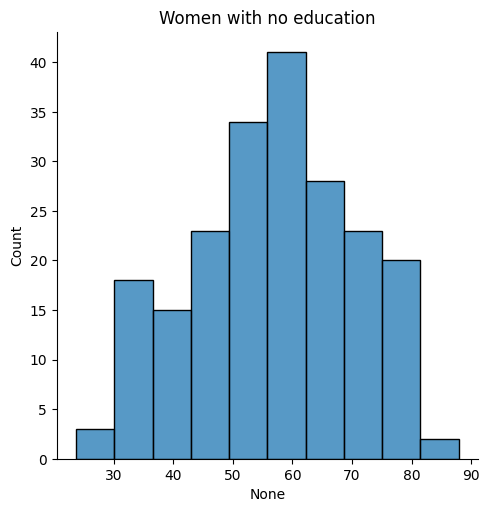

In [14]:
sns.displot(data=mlrcare,x="None")
plt.title("Women with no education")
plt.show()

The highest count is seen in the age group of 55-60%, with around 40 Countries. This implies that about 55-60% of children with fever in most countries had their mothers with no education sought advice for their treatment.

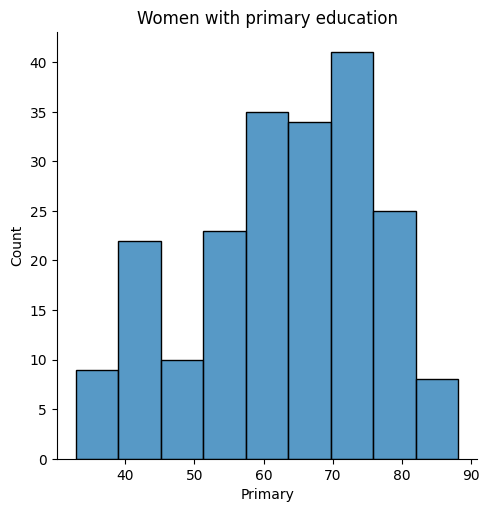

In [15]:
sns.displot(data=mlrcare,x="Primary")
plt.title("Women with primary education")
plt.show()

The visual above implies that about 65% of children with fever in most countries had their mothers with primary education sought advice for their treatment.

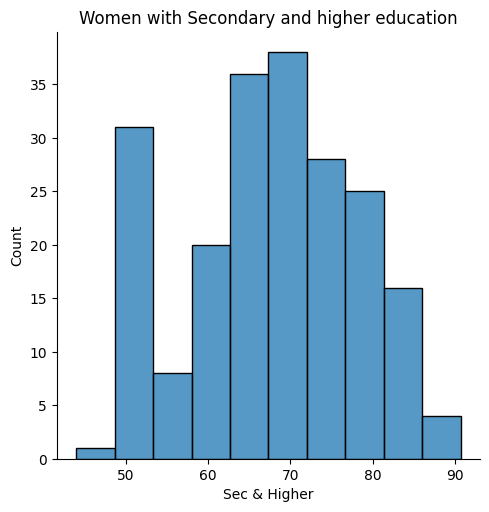

In [16]:
sns.displot(data=mlrcare,x="Sec & Higher")
plt.title("Women with Secondary and higher education")
plt.show()

The visual above implies that about 70% of children with fever in most countries had their mothers with Secondary or Higher education sought advice for their treatment.

**In conclusion, we can state that the more educated the mother is, the more likely she is to seek advice when her child develop a fever.**

## MlRDIAG-Malaria Diagnostics Usage-Percentage of febrile children (under age 5)  who had a finger or heel stick for malaria testing.

In [17]:
mlrdiag = pd.read_excel("Final_malaria.xlsx", sheet_name = 1)
mlrdiag

,ISO,Countries,UNICEF Reporting Region,UNICEF Programme Region,World Bank Income Group (2022),Year,Short Source,Long Source,National,Male,Female,Rural,Urban,Poorest,Second,Middle,Fourth,Richest,None,Primary,Sec & Higher
0,AFG,Afghanistan,South Asia,ROSA,Low income,2015,DHS 2015,Demographic and Health Survey 2015,7.9,NaN,NaN,8.5,6.0,3.9,9.4,9.6,10.5,5.9,NaN,NaN,NaN
1,AGO,Angola,Eastern and Southern Africa,ESARO,Lower middle income,2011,MIS 2011,Malaria Indicator Survey 2011,26.0,24.8,27.0,16.4,46.0,7.9,12.8,18.6,33.3,41.6,NaN,NaN,NaN
2,AGO,Angola,Eastern and Southern Africa,ESARO,Lower middle income,2016,DHS 2015-2016,Demographic and Health Survey 2015-2016,34.3,35.5,33.0,23.4,42.8,19.7,29.2,38.9,44.1,52.7,NaN,NaN,NaN
3,BDI,Burundi,Eastern and Southern Africa,ESARO,Low income,2010,DHS 2010,Demographic and Health Survey 2010,27.0,26.5,27.6,25.6,47.8,18.7,24.9,27.4,31.8,36.3,NaN,NaN,NaN
4,BDI,Burundi,Eastern and Southern Africa,ESARO,Low income,2012,MIS 2012,Malaria Indicator Survey 2012,28.3,29.2,27.5,27.9,34.7,29.9,24.4,30.6,27.6,30.1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,ZMB,Zambia,Eastern and Southern Africa,ESARO,Low income,2019,DHS 2018-2019,Demographic and Health Survey 2018-2019,63.0,64.4,61.4,67.4,52.0,67.1,69.9,68.5,47.0,51.5,68.2,65.4,57.6
148,ZWE,Zimbabwe,Eastern and Southern Africa,ESARO,Lower middle income,2011,DHS 2010-2011,Demographic and Health Survey 2010-2011,7.0,8.0,7.0,8.0,5.0,5.0,14.0,5.0,2.0,2.0,NaN,NaN,NaN
149,ZWE,Zimbabwe,Eastern and Southern Africa,ESARO,Lower middle income,2014,MICS 2014,Multiple Indicator Cluster Survey 2014,14.1,13.4,14.9,16.3,6.6,14.9,17.7,16.5,12.9,5.1,NaN,NaN,NaN
150,ZWE,Zimbabwe,Eastern and Southern Africa,ESARO,Lower middle income,2015,DHS 2015,Demographic and Health Survey 2015,12.7,13.7,11.8,14.7,8.7,16.2,12.5,12.8,9.2,12.9,NaN,NaN,NaN


In [18]:
mlrdiag.isnull().sum()

ISO                                 0
Countries                           0
UNICEF Reporting Region             0
UNICEF Programme Region             0
World Bank Income Group (2022)      0
Year                                0
Short Source                        0
Long Source                         0
National                            2
Male                               31
Female                             31
Rural                               5
Urban                               5
Poorest                             7
Second                              8
Middle                              8
Fourth                              9
Richest                            10
None                              119
Primary                           117
Sec & Higher                      116
dtype: int64

In [19]:
mlrdiag.head(2)

,ISO,Countries,UNICEF Reporting Region,UNICEF Programme Region,World Bank Income Group (2022),Year,Short Source,Long Source,National,Male,Female,Rural,Urban,Poorest,Second,Middle,Fourth,Richest,None,Primary,Sec & Higher
0,AFG,Afghanistan,South Asia,ROSA,Low income,2015,DHS 2015,Demographic and Health Survey 2015,7.9,NaN,NaN,8.5,6.0,3.9,9.4,9.6,10.5,5.9,NaN,NaN,NaN
1,AGO,Angola,Eastern and Southern Africa,ESARO,Lower middle income,2011,MIS 2011,Malaria Indicator Survey 2011,26.0,24.8,27.0,16.4,46.0,7.9,12.8,18.6,33.3,41.6,NaN,NaN,NaN


In [20]:
# Columns to impute
columns_to_impute = ['National', 'Male', 'Female', 'Rural', 'Urban', 'Poorest', 'Second', 'Middle', 'Fourth', 'Richest', 'None', 'Primary', 'Sec & Higher']

#Create a KNN Imputer object
imputer = KNNImputer(n_neighbors=5, weights='uniform')

#Fit and transform the data
imputed_data = imputer.fit_transform(mlrdiag[columns_to_impute])

# Convert the imputed data back to a pandas DataFrame
imputed_data = pd.DataFrame(imputed_data, columns=columns_to_impute)

# Replace the original columns with the imputed data
mlrdiag[columns_to_impute] = imputed_data

In [21]:
mlrdiag.isna().sum()

ISO                               0
Countries                         0
UNICEF Reporting Region           0
UNICEF Programme Region           0
World Bank Income Group (2022)    0
Year                              0
Short Source                      0
Long Source                       0
National                          0
Male                              0
Female                            0
Rural                             0
Urban                             0
Poorest                           0
Second                            0
Middle                            0
Fourth                            0
Richest                           0
None                              0
Primary                           0
Sec & Higher                      0
dtype: int64

In [22]:
mlrdiag.duplicated().sum()

0

In [23]:
mlrdiag.head(2)

,ISO,Countries,UNICEF Reporting Region,UNICEF Programme Region,World Bank Income Group (2022),Year,Short Source,Long Source,National,Male,Female,Rural,Urban,Poorest,Second,Middle,Fourth,Richest,None,Primary,Sec & Higher
0,AFG,Afghanistan,South Asia,ROSA,Low income,2015,DHS 2015,Demographic and Health Survey 2015,7.9,7.16,7.58,8.5,6.0,3.9,9.4,9.6,10.5,5.9,7.96,7.80,11.26
1,AGO,Angola,Eastern and Southern Africa,ESARO,Lower middle income,2011,MIS 2011,Malaria Indicator Survey 2011,26.0,24.80,27.00,16.4,46.0,7.9,12.8,18.6,33.3,41.6,21.60,24.74,31.14


In [24]:
mlrdiag.head(2)

,ISO,Countries,UNICEF Reporting Region,UNICEF Programme Region,World Bank Income Group (2022),Year,Short Source,Long Source,National,Male,Female,Rural,Urban,Poorest,Second,Middle,Fourth,Richest,None,Primary,Sec & Higher
0,AFG,Afghanistan,South Asia,ROSA,Low income,2015,DHS 2015,Demographic and Health Survey 2015,7.9,7.16,7.58,8.5,6.0,3.9,9.4,9.6,10.5,5.9,7.96,7.80,11.26
1,AGO,Angola,Eastern and Southern Africa,ESARO,Lower middle income,2011,MIS 2011,Malaria Indicator Survey 2011,26.0,24.80,27.00,16.4,46.0,7.9,12.8,18.6,33.3,41.6,21.60,24.74,31.14


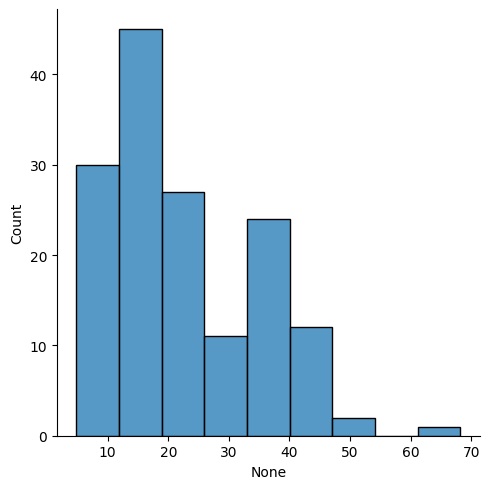

In [25]:
sns.displot(data=mlrdiag,x="None")
plt.show()

This plot implies that about 12-18% of children who were tested for malaria in most countries had their mothers having no education.

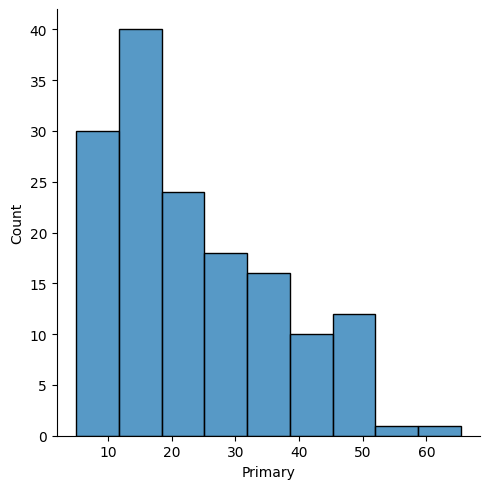

In [26]:
sns.displot(data=mlrdiag,x="Primary")
plt.show()

The above plot infers that about 12-18% of children who were tested for malaria in most countries had their mothers having **primary** education.

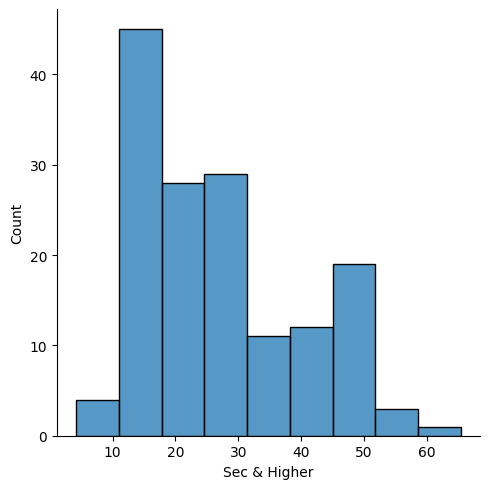

In [27]:
sns.displot(data=mlrdiag,x="Sec & Higher")
plt.show()

The above plot infers that about 12-17% of children who were tested for malaria in most countries had their mothers having **Secondary and Higher** education.

**Our conclusion from this data shows that the education of a mother doesn't directly affect if or not she will bring in her child for malaria diagnosis.**

## MLRACT-First-line treatment (ACT) for children under age 5 with fever-Percentage of febrile children (under age 5) receiving ACT (first-line antimalarial drug), among those receiving any antimalarial drugs.

In [28]:
mlract = pd.read_excel("Final_malaria.xlsx", sheet_name = 2)
mlract.head(2)

,ISO,Countries,UNICEF Reporting Region,UNICEF Programme Region,World Bank Income Group (2022),Year,Short Source,Long Source,National,Male,Female,Rural,Urban,Poorest,Second,Middle,Fourth,Richest,None,Primary,Sec & Higher
0,AFG,Afghanistan,South Asia,ROSA,Low income,2015,DHS 2015,Demographic and Health Survey 2015,4.4,5.3,3.6,6.6,0.2,5.9,11.1,2.2,3.9,NaN,NaN,NaN,NaN
1,AGO,Angola,Eastern and Southern Africa,ESARO,Lower middle income,2007,MIS 2006-2007,Malaria Indicator Survey 2006-2007,5.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
mlract.isnull().sum()

ISO                                 0
Countries                           0
UNICEF Reporting Region             0
UNICEF Programme Region             0
World Bank Income Group (2022)      0
Year                                0
Short Source                        0
Long Source                         0
National                            4
Male                               46
Female                             44
Rural                              33
Urban                              41
Poorest                            46
Second                             45
Middle                             51
Fourth                             49
Richest                            52
None                              136
Primary                           137
Sec & Higher                      140
dtype: int64

In [30]:
# Columns to impute
columns_to_impute = ['National', 'Male', 'Female', 'Rural', 'Urban', 'Poorest', 'Second', 'Middle', 'Fourth', 'Richest', 'None', 'Primary', 'Sec & Higher']

#Create a KNN Imputer object
imputer = KNNImputer(n_neighbors=5, weights='uniform')

#Fit and transform the data
imputed_data = imputer.fit_transform(mlract[columns_to_impute])

# Convert the imputed data back to a pandas DataFrame
imputed_data = pd.DataFrame(imputed_data, columns=columns_to_impute)

# Replace the original columns with the imputed data
mlract[columns_to_impute] = imputed_data

In [31]:
mlract.isnull().sum()

ISO                               0
Countries                         0
UNICEF Reporting Region           0
UNICEF Programme Region           0
World Bank Income Group (2022)    0
Year                              0
Short Source                      0
Long Source                       0
National                          0
Male                              0
Female                            0
Rural                             0
Urban                             0
Poorest                           0
Second                            0
Middle                            0
Fourth                            0
Richest                           0
None                              0
Primary                           0
Sec & Higher                      0
dtype: int64

In [32]:
mlract.head(2)

,ISO,Countries,UNICEF Reporting Region,UNICEF Programme Region,World Bank Income Group (2022),Year,Short Source,Long Source,National,Male,Female,Rural,Urban,Poorest,Second,Middle,Fourth,Richest,None,Primary,Sec & Higher
0,AFG,Afghanistan,South Asia,ROSA,Low income,2015,DHS 2015,Demographic and Health Survey 2015,4.4,5.30,3.60,6.60,0.20,5.9,11.10,2.20,3.90,5.18,3.82,10.14,7.88
1,AGO,Angola,Eastern and Southern Africa,ESARO,Lower middle income,2007,MIS 2006-2007,Malaria Indicator Survey 2006-2007,5.5,7.08,4.06,5.58,6.34,4.6,5.68,8.44,4.82,6.10,3.82,10.14,7.88


In [33]:
mlract.duplicated().sum()

0

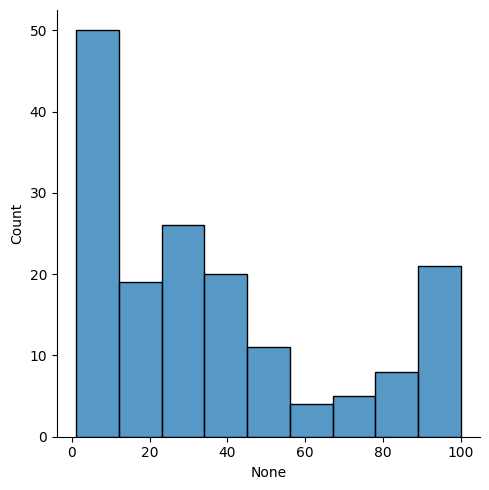

In [34]:
sns.displot(data=mlract,x="None")
plt.show()

The chart above indicates that about 1-10% of children who recieves antimalaria treatment in most countries had their mothers having no education.

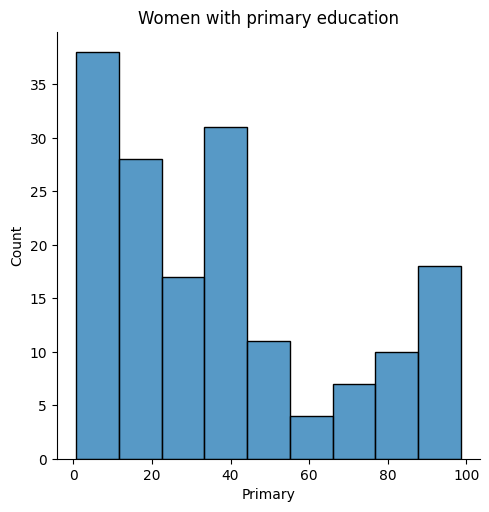

In [35]:
sns.displot(data=mlract,x="Primary")
plt.title("Women with primary education")
plt.show()

The chart above indicates that about 1-15% of children who recieves antimalaria treatment in most countries had their mothers having primary education.

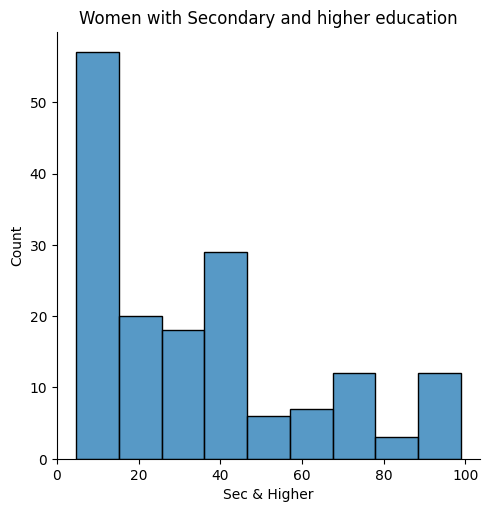

In [36]:
sns.displot(data=mlract,x="Sec & Higher")
plt.title("Women with Secondary and higher education")
plt.show()

The chart above indicates that about 5-15% of children who recieves antimalaria treatment in most countries had their mothers having Secondary and higher education.

**In conclusion, this data does not show if the mother's educational level is dependent on whether the child will receive antimalaria treatment. This data shows no clear correlation.**

#### Modelling

In [37]:
columns_to_keep = ['National', 'None', 'Primary', 'Sec & Higher']

# Select these columns from each DataFrame
mlrcare_selected = mlrcare[columns_to_keep]
mlrdiag_selected = mlrdiag[columns_to_keep]
mlract_selected = mlract[columns_to_keep]

Building seperate models for the 3 different dataset (mlrcare, mlrdiag, mlract) because the 3 dataset has same variable names but contain different information

#### mlrcare model

In [39]:
# building model for the mlrcare dataset
X = mlrcare_selected.drop(columns = ['National'])
y = mlrcare_selected[['National']]

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
numerical = ['None', 'Primary', 'Sec & Higher']

In [42]:
scaler = MinMaxScaler()
scaler.fit(x_train[numerical])

MinMaxScaler()

In [43]:
x_train[numerical] = scaler.transform(x_train[numerical])

In [44]:
x_train.head()

,None,Primary,Sec & Higher
86,0.586242,0.573551,0.477516
202,0.664765,0.700362,0.556317
67,0.586242,0.605797,0.549036
82,0.596309,0.587319,0.554604
204,0.902685,0.762681,0.783726


In [45]:
x_test[numerical] = scaler.transform(x_test[numerical])

In [46]:
x_test.head()

,None,Primary,Sec & Higher
161,0.553356,0.530797,0.610707
15,0.553356,0.597101,0.503212
73,0.693960,0.712319,0.697216
96,0.944295,0.904348,0.886938
166,0.490940,0.451087,0.391006


In [47]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [48]:
coefficients = model.coef_
print(coefficients)

[[36.32372328 14.64173702 10.60432609]]


From the model, we have 3 different coefficients, which indicates the coeeficients of (None, Primary, Sec & Higher) varaibles respectively. This provides a deeper relationship into the effects of maternal education on the rate of malaria on children.

The model tells us that the None (which is the percentage of children having fever whose mothers with no education sought advice or treatment for) has the highest effects on the overall population of children with fever, followed by the primary variable.

This implies that mothers who has no education contributes most to a higher malaria rates among the children. Which shows that the lower the education of the mothers, the higher the malaria rates among the children.

#### mlrdiag model

In [50]:
# building model for the mlrdiag dataset
X = mlrdiag_selected.drop(columns = ['National'])
y = mlrdiag_selected[['National']]

In [51]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
numerical = ['None', 'Primary', 'Sec & Higher']

In [53]:
scaler = MinMaxScaler()
scaler.fit(x_train[numerical])

MinMaxScaler()

In [54]:
x_train[numerical] = scaler.transform(x_train[numerical])

In [55]:
x_train.head()

,None,Primary,Sec & Higher
29,0.236449,0.230444,0.255882
22,0.251402,0.268499,0.297712
51,0.084112,0.076110,0.138889
75,0.591121,0.782241,0.740196
11,0.563551,0.490063,0.437255


In [56]:
x_test[numerical] = scaler.transform(x_test[numerical])

In [57]:
x_test.head()

,None,Primary,Sec & Higher
68,0.336449,0.340381,0.238562
147,1.481308,1.276956,0.872549
96,0.242991,0.272727,0.230392
82,0.741121,0.742918,0.730719
135,0.658879,0.841438,0.748366


In [58]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [59]:
coefficients = model.coef_
print(coefficients)

[[ 8.07904825 40.40812902  4.85946773]]


From the model, we have 3 different coefficients, which indicates the coeeficients of (None, Primary, Sec & Higher) varaibles respectively. This provides a deeper relationship into the effects of maternal education on the rate of malaria on children.

The model tells us that the Sec & Higher (which is the percentage of children who were tested for malaria whose mothers has secondary or higher education) has the lowest effects on the overall population of children who were tested for malaria.

This implies that mothers who has secondary or higher education contributes least to a higher malaria rates among the children. Which shows that the higher the education of the mothers, the lesser the malaria rates among the children.

#### mlract model

In [60]:
# building model for the mlract dataset
X = mlract_selected.drop(columns = ['National'])
y = mlract_selected[['National']]

In [61]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
numerical = ['None', 'Primary', 'Sec & Higher']

In [63]:
scaler = MinMaxScaler()
scaler.fit(x_train[numerical])

MinMaxScaler()

In [64]:
x_train[numerical] = scaler.transform(x_train[numerical])

In [65]:
x_train.head()

,None,Primary,Sec & Higher
84,0.982811,1.000000,1.000000
2,0.193124,0.217365,0.193631
94,0.967644,0.977528,0.917834
45,0.027503,0.113177,0.033758
42,0.087159,0.146476,0.080467


In [66]:
x_test[numerical] = scaler.transform(x_test[numerical])

In [67]:
x_test.head()

,None,Primary,Sec & Higher
135,0.171891,0.193258,0.125265
115,0.176340,0.217365,0.193631
131,0.401011,0.373647,0.348408
55,0.065723,0.064351,0.047771
95,0.460061,0.448417,0.416773


In [68]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [69]:
coefficients = model.coef_
print(coefficients)

[[50.68254443 20.01555925 26.60376744]]


From the model, we have 3 different coefficients, which indicates the coeeficients of (None, Primary, Sec & Higher) varaibles respectively. This provides a deeper relationship into the effects of maternal education on the rate of malaria on children.

The model tells us that the None variable (which is the percentage of children who recieved anti-malaria drugs having mothers with no education) has the highest effects on the overall population of children who were giving anti-malaria drugs.

This implies that mothers who has no education contributes most to a higher malaria rates among the children. Which shows that the lower the education of the mothers, the higher the malaria rates among the children.